In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
import librosa
from spafe.features.gfcc import gfcc

In [58]:
wav1 = 'sample3s.wav'
wav2 = 'sample9s.wav'

samplerate1, data1 = wavfile.read(wav1)
samplerate2, data2 = wavfile.read(wav2)
print('Sampling Rate:', samplerate1, '; Audio Shape:', np.shape(data1))
print('Sampling Rate:', samplerate2, '; Audio Shape:', np.shape(data2))

Sampling Rate: 44100 ; Audio Shape: (140928, 2)
Sampling Rate: 44100 ; Audio Shape: (422784, 2)


In [27]:
sd.play(data1, samplerate1)
sd.wait()

In [28]:
sd.play(data2, samplerate2)
sd.wait()

In [59]:
duration1 = len(data1) / samplerate1
time1 = np.arange(0, duration1, 1 / samplerate1)

duration2 = len(data2) / samplerate2
time2 = np.arange(0, duration2, 1 / samplerate2)

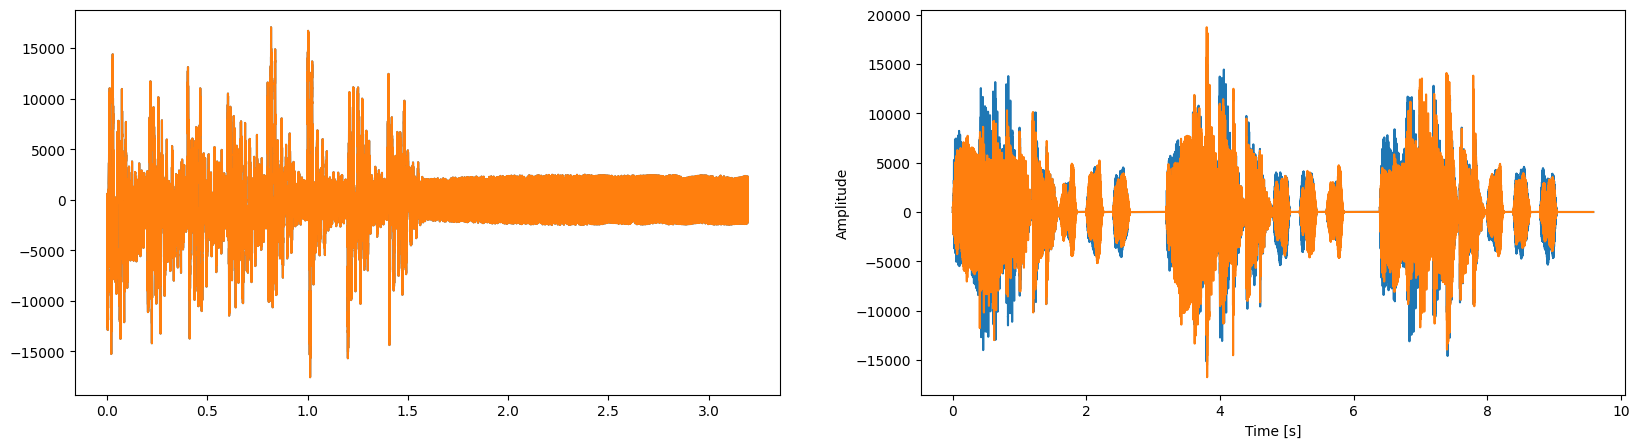

In [60]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
axs[0].plot(time1, data1)
axs[1].plot(time2, data2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

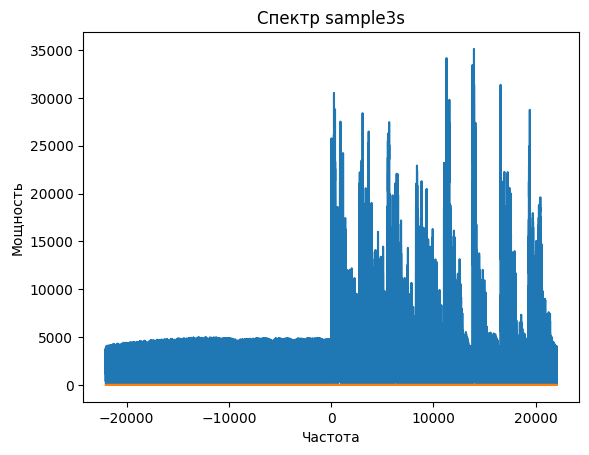

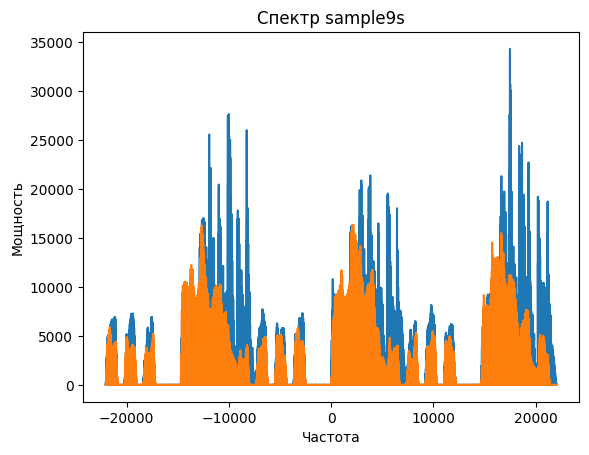

In [61]:
from scipy.fft import fft, fftfreq

duration = len(data1) / samplerate1
N = int(samplerate1 * duration)
yf = fft(data1)
xf = fftfreq(N, 1 / samplerate1)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('Спектр sample3s')
plt.show()

duration = len(data2) / samplerate2
N = int(samplerate2 * duration)
yf = fft(data2)
xf = fftfreq(N, 1 / samplerate2)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('Спектр sample9s')
plt.show()

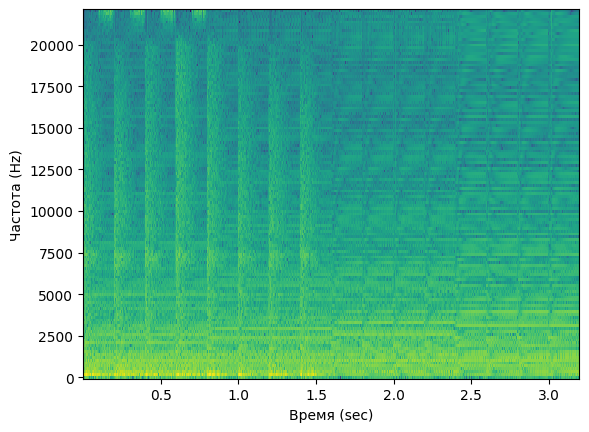

In [62]:
adata = data1[:, 0]
s = samplerate1

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Частота (Hz)')
plt.xlabel('Время (sec)')
plt.show()

C:\Users\danon\AppData\Local\Temp\ipykernel_5556\1796999628.py:5: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


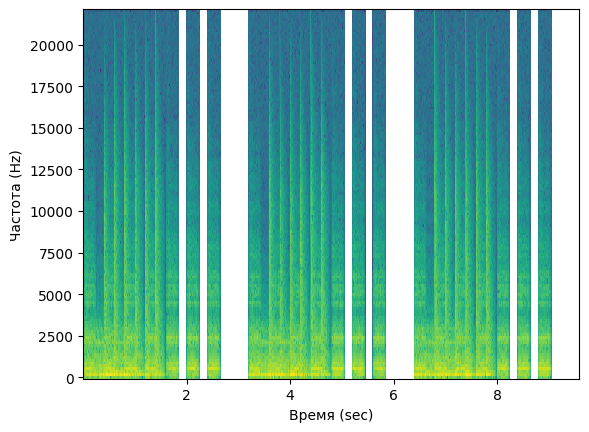

In [63]:
adata = data2[:, 0]
s = samplerate2

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Частота (Hz)')
plt.xlabel('Время (sec)')
plt.show()

In [64]:
samples1, sample_rate1 = librosa.load(wav1)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

samples2, sample_rate2 = librosa.load(wav2)

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)

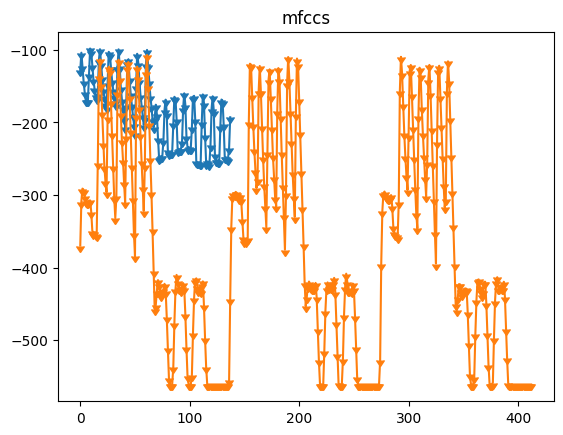

In [65]:
s1 = mfccs1[0:1,:][0,:]
t1 = [*range(len(s1))]
s2 = mfccs2[0:1,:][0,:]
t2 = [*range(len(s2))]
plt.plot(t1,  s1.reshape(138,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.plot(t2,  s2.reshape(413,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs')
plt.show()

In [66]:
samples1, sample_rate1 = librosa.load(wav1)

y1 = samples1
sr1 = sample_rate1
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)

samples2, sample_rate2 = librosa.load(wav2)

y2 = samples2
sr2 = sample_rate2
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)   

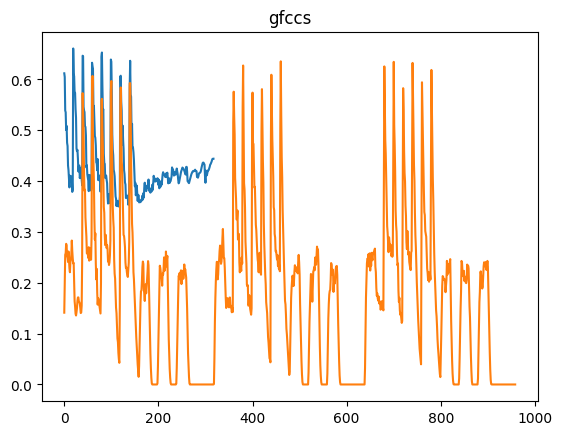

In [67]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()

Барабаны в начале первой и второй аудиодорожки похожи по звучанию и ритму, это же мы можем увидеть на графиках и спектрограмме